## Создание приложения

Для того что бы использовать возможности VK API нужно получить access token аккаунта. Для этого Вам потребуется [создать Standalone-приложение](https://vk.com/editapp?act=create).

После того как мы создали приложение Вы можете найти его разделе [Приложения](https://vk.com/apps?act=manage).

## Приватный токен

Многие методы VK API предполагают наличие приватного токена, который необходимо передать в качетсве параметра при выполнении запроса. Процесс получения токена описан в документации: https://vk.com/dev/access_token

> Осторожно! Токен называется приватным не просто так. Обладающий им человек может производить самые разные действия от Вашего имени. Не говорите его никому.

Если вкратце, то Вам поднадобится id Вашего приложения и [список прав доступа](https://vk.com/dev/permissions), которые Вы хотите предоставить пользователю API. Затем необходимо указать эти данные в качестве параметров в URL следующего формата
https://oauth.vk.com/authorize?client_id={APP_ID}&scope={APP_PERMISSIONS}&response_type=token, подтвердить своё намерение предоставить доступ и скопировать токент из поля URL открывшегося окна.

Покажем на примере:

In [1]:
APP_ID = 6703292
PERMISSIONS = ""
AUTH_URL = f"https://oauth.vk.com/authorize?client_id={APP_ID}&scope={PERMISSIONS}&response_type=token"
AUTH_URL

'https://oauth.vk.com/authorize?client_id=6703292&scope=&response_type=token'

Пройдя по этой ссылки мы попадём настраницу с адресом https://oauth.vk.com/blank.html#access_token=5614afdcc2bcd42cea3d9c5edc130101dd4be5339b484131870dc12337e5b74b94411de69f0996379dd6b&expires_in=86400&user_id=18779389, где `5614afdcc2bcd42cea3d9c5edc130101dd4be5339b484131870dc12337e5b74b94411de69f0996379dd6b` — искомый access token. Сохраним его.

In [2]:
TOKEN = "29ed222f0f7d213adee297bded58d2b2bea102ef3848081fce76a32b018c2f3c723585889edd0027fed00"

## Выполнение запросов к VK API

После получения приватного токена можно смело выполнять запросы к API, используя нужные Вам [методы](https://vk.com/dev/methods). Формат запроса следующий: https://api.vk.com/method/METHOD_NAME?PARAMETERS&access_token=ACCESS_TOKEN. Например, для получения информации о пользователе c id 48523 нужно выполнить следующй запрос:

In [3]:
import requests

uid = 48523
res = requests.get(
    "https://api.vk.com/method/users.get",
    params={"user_ids": uid,
            "fields": "nickname, screen_name, sex, bdate, city, country, timezone, counters, photo_medium",
            "access_token": TOKEN,
            "v": 5.85}).json()
res

{'response': [{'id': 48523,
   'first_name': 'Александр',
   'last_name': 'Сироткин',
   'sex': 2,
   'nickname': '',
   'screen_name': 'avsirotkin',
   'bdate': '18.4.1983',
   'city': {'id': 2, 'title': 'Санкт-Петербург'},
   'country': {'id': 1, 'title': 'Россия'},
   'timezone': 3,
   'photo_medium': 'https://sun9-21.userapi.com/impf/c845420/v845420363/1d0e97/NSSEn3344ns.jpg?size=100x0&quality=88&crop=101,4,974,974&sign=79c1aa87eb2f0e40ff8cf9736965580e&c_uniq_tag=Oepz6u5MdScFyT8B0f2E_IQA5fecdooX2j0Riup9zQY&ava=1',
   'counters': {'albums': 6,
    'videos': 7,
    'audios': 61,
    'notes': 0,
    'photos': 35,
    'groups': 227,
    'gifts': 10,
    'friends': 342,
    'online_friends': 40,
    'user_photos': 132,
    'followers': 60,
    'subscriptions': 0,
    'pages': 38,
    'clips_followers': 402}}]}

## Ограничения VK API
**Ограничение количества запросов через vk api — не более трёх запросов в секунду.**

https://vk.com/dev/api_requests

3. Ограничения и рекомендации

3.1. Частотные ограничения

К методам API ВКонтакте (за исключением методов из секций secure и ads) с ключом доступа пользователя или сервисным ключом доступа можно обращаться не чаще 3 раз в секунду. Для ключа доступа сообщества ограничение составляет 20 запросов в секунду. Если логика Вашего приложения подразумевает вызов нескольких методов подряд, имеет смысл обратить внимание на метод execute. Он позволяет совершить до 25 обращений к разным методам в рамках одного запроса.

Для методов секции ads действуют собственные ограничения, ознакомиться с ними Вы можете на этой странице.

Максимальное число обращений к методам секции secure зависит от числа пользователей, установивших приложение. Если приложение установило меньше 10 000 человек, то можно совершать 5 запросов в секунду, до 100 000 — 8 запросов, до 1 000 000 — 20 запросов, больше 1 млн. — 35 запросов в секунду.

Если Вы превысите частотное ограничение, сервер вернет ошибку с кодом 6: "Too many requests per second.".

3.2. Количественные ограничения
Помимо ограничений на частоту обращений, существуют и количественные ограничения на вызов однотипных методов. По понятным причинам, мы не предоставляем информацию о точных лимитах.

После превышения количественного лимита доступ к конкретному методу может требовать ввода капчи (см. captcha_error), а также может быть временно ограничен (в таком случае сервер не возвращает ответ на вызов конкретного метода, но без проблем обрабатывает любые другие запросы).


Сделать паузу при выполнении какой-либо операции в Python можно с помощью функции `sleep` из модуля `time`, которой необходимо передать количество секунд, на которые присотановится выполнение программы:

In [4]:
import time

for i in range(5):
    time.sleep(.5)
    print(i)

0
1
2
3
4


## Ошибки при работе с VK API

Достаточно часто VK API возвращает [ошибки](https://vk.com/dev/errors), которые необходимо отлавливать. В ином случае к концу сбора данных Вы можете обнаружить, что с таким трудом собранная база данных абсолютно непригода к работе, поскольку вместо информации о респонденте Вы имеет следующие данные:

In [5]:
res = requests.get(
    "https://api.vk.com/method/users.get",
    params={"user_ids": uid,
            "fields": "nickname, screen_name, sex, bdate, city, country, timezone, counters, photo_medium",
            "access_token": TOKEN,
            "version": 5.85}).json()
res

{'error': {'error_code': 8,
  'error_msg': 'Invalid request: v is required. Version param should be passed as "v". "version" param is invalid and not supported.',
  'request_params': [{'key': 'user_ids', 'value': '48523'},
   {'key': 'fields',
    'value': 'nickname, screen_name, sex, bdate, city, country, timezone, counters, photo_medium'},
   {'key': 'version', 'value': '5.85'},
   {'key': 'method', 'value': 'users.get'},
   {'key': 'oauth', 'value': '1'}]}}

Также существует множество всяких другх тонкостей при работе с VK API. Например, для получения списка друзей пользователя необходимо использовать метод [`friends.get`](https://vk.com/dev/friends.get), который может возвращать как просто список друзей, так и детальную информацию о каждом друге, в зависимости от того, указан ли параметр `fields` (если не указан, возвращает просто список id). Причем если параметр `fields` указан, то за один запрос Вы не можете получить информацию о более, чем 5000 человек.

In [6]:
def get_friends_ids(user_id, fields = ""):
    res = requests.get(
    "https://api.vk.com/method/friends.get",
    params={"user_id": user_id,
            "fields": fields,
            "access_token": TOKEN,
            "v": 5.85}).json()
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    if res.get('error'):
        print( res.get('error'))
        return list()
    return res[u'response']

In [7]:
full_friends = get_friends_ids(48523, "name, sex")
full_friends

{'count': 342,
 'items': [{'id': 1099,
   'first_name': 'Игорь',
   'last_name': 'Балтийский',
   'sex': 2,
   'online': 0,
   'track_code': 'fabe3a27qVtufILFUV0AVbtnKzOTHcw_uXIibPrtcrylP1du5DnEMGdJt5cDUggx1pCAixBs3lk'},
  {'id': 2541,
   'first_name': 'Александр',
   'last_name': 'Смаль',
   'sex': 2,
   'online': 0,
   'track_code': 'f676fcb4tAv6-hT-bI6XWd4NY9uVkedh9sp1wsXJMGSz3hh8_CrZYKGfca08iZU9svrIYxbg9Qc'},
  {'id': 2619,
   'first_name': 'Андрей',
   'last_name': 'Фильченков',
   'sex': 2,
   'online': 0,
   'track_code': 'f6bcf9daR1mzVcXNpIB3hiDRJtWsoQ563Bwmk6MiivA7jSru6qMqMuhnos-r03flTyaNbS_QHBw'},
  {'id': 4016,
   'first_name': 'Олег',
   'last_name': 'Етеревский',
   'sex': 2,
   'online': 0,
   'track_code': '0a3292ae9kkxfu1NBWkurRAe5VxjIDPudYiQYMiAwt-dOCCKe1KbIm5Ji08GPnySfulO5OBRIYg'},
  {'id': 4181,
   'first_name': 'Антон',
   'last_name': 'Антонов',
   'sex': 2,
   'online': 0,
   'track_code': '07d6d80b4kAPrPjP13D-RRxPGAEiLFxfbOYRAi6hrxayhbj2Q_-PKwLOyMPWeal0dbizuaFdTj

In [10]:
import tqdm

full_graph = {}
for i in tqdm.tqdm_notebook(full_friends["items"]):
#for i in tqdm.notebook.tqdm(full_friends["items"]):
    full_graph[i["id"]] = get_friends_ids(i["id"])
    time.sleep(.3)

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '7600'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.85'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '388142'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.85'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '1923197'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.85'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '4609985'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.85'}, {'key': 'method', 'value': 'friends.get'

In [11]:
len([i for i in full_graph])

342

In [13]:
import json
fp = open("nodes.txt", "tw")
json.dump(full_friends, fp)
fp.close()


fp = open("edges.txt", "tw")
json.dump(full_graph, fp)
fp.close()


In [3]:
import json
full_friends = json.load(open("nodes.txt", "tr"))
full_graph = json.load(open("edges.txt", "tr"))




In [4]:
full_graph['1099']

{'count': 308,
 'items': [481,
  533,
  726,
  1095,
  1106,
  1107,
  1110,
  1113,
  1117,
  1118,
  1119,
  1127,
  1153,
  1166,
  1213,
  1252,
  1354,
  1405,
  1567,
  1598,
  1792,
  1860,
  2150,
  2212,
  2731,
  2767,
  3020,
  3099,
  3245,
  3368,
  3461,
  3463,
  3520,
  3549,
  3556,
  3571,
  3581,
  3597,
  3646,
  3653,
  3685,
  3736,
  3747,
  3768,
  3915,
  3934,
  3962,
  4150,
  4163,
  4189,
  4201,
  4318,
  4434,
  4485,
  4734,
  4761,
  4799,
  4836,
  4890,
  5043,
  5114,
  5245,
  5405,
  5685,
  5733,
  5768,
  5770,
  5778,
  5945,
  5992,
  6101,
  6138,
  6179,
  6294,
  6441,
  6486,
  6496,
  6715,
  6748,
  7068,
  7130,
  7642,
  7663,
  7990,
  8483,
  8704,
  8781,
  9216,
  9595,
  9694,
  10168,
  11082,
  11427,
  11662,
  12235,
  13570,
  13629,
  13780,
  14066,
  15745,
  19687,
  21785,
  22351,
  22944,
  23231,
  23593,
  25338,
  26047,
  27419,
  28314,
  28569,
  29037,
  29562,
  30335,
  30851,
  31522,
  31705,
  33719,
  36597

In [5]:
import networkx as nx
G = nx.Graph()

In [6]:
full_graph['7600']

[]

In [7]:
for i in full_friends["items"]:
    G.add_node(i["id"], name = i["first_name"]+" "+i["last_name"])

In [8]:
my_friends = list(nx.nodes(G))
for i in my_friends:
#    print(i)
    if "items" in full_graph[str(i)]:
        for j in full_graph[str(i)]["items"]:
            if j in my_friends:
                G.add_edge(i, j)
    

In [9]:
nx.edges(G)

EdgeView([(1099, 5245), (1099, 9216), (1099, 108149), (1099, 204896), (2541, 5245), (2541, 6099), (2541, 6413), (2541, 7373), (2541, 9216), (2541, 17787), (2541, 22802), (2541, 108149), (2541, 274243), (2541, 388142), (2541, 497610), (2541, 601028), (2541, 1581614), (2541, 1634182), (2541, 1695366), (2541, 1713834), (2541, 4609985), (2541, 7180145), (2541, 86040384), (2541, 109339740), (2541, 203248980), (2541, 232016272), (2619, 4016), (2619, 5245), (2619, 6099), (2619, 6413), (2619, 17787), (2619, 30518), (2619, 39782), (2619, 80593), (2619, 108149), (2619, 930855), (2619, 1081855), (2619, 1298210), (2619, 1713834), (2619, 2229214), (2619, 2457032), (2619, 2724404), (2619, 6649825), (2619, 7180145), (2619, 7560093), (2619, 7838443), (2619, 10051843), (2619, 11765316), (2619, 42193128), (2619, 51102679), (2619, 71079139), (2619, 80870331), (2619, 144144243), (2619, 203248980), (2619, 240680770), (2619, 276190628), (4016, 4844), (4016, 6099), (4016, 6413), (4016, 7091), (4016, 7373), (

In [10]:
nx.get_node_attributes(G, "name")

{1099: 'Игорь Балтийский',
 2541: 'Александр Смаль',
 2619: 'Андрей Фильченков',
 4016: 'Олег Етеревский',
 4181: 'Антон Антонов',
 4844: 'Антон Чухнов',
 4969: 'Илья Трофимов',
 5245: 'Diana Sidorenko',
 5338: 'Павел Герасимов',
 5392: 'Никита Иваньков',
 6099: 'Дмитрий Антипов',
 6413: 'Юрий Лифшиц',
 7091: 'Сергей Малев',
 7207: 'Алексей Кузнецов',
 7373: 'Михаил Дворкин',
 7600: 'DELETED ',
 7607: 'Анастасия Белых',
 9017: 'Ольга Мордвина-Щодро',
 9216: 'Сергей Нурк',
 9897: 'Евгений Лапин',
 10894: 'Ирина Флотская',
 11191: 'Андрей Лопатин',
 12281: 'Karp Paul',
 17556: 'Алексей Натекин',
 17787: 'Николай Вяххи',
 19333: 'Anton Korobeynikov',
 20304: 'Руслан Пусев',
 22802: 'Иван Казменко',
 23265: 'Артём Артём',
 29046: 'Наталия Баранова',
 29580: 'Виктор Петров',
 30518: 'Антон Попович',
 35754: 'Александр Крутиков',
 37439: 'Сергей Кузнецов',
 37584: 'Полина Витенко',
 37960: 'Миша Лакунин',
 39749: 'Юлия Сальникова',
 39782: 'Мария Королева',
 42104: 'Павел Павлов',
 49489: 'Е

In [11]:
nx.nodes(G)

NodeView((1099, 2541, 2619, 4016, 4181, 4844, 4969, 5245, 5338, 5392, 6099, 6413, 7091, 7207, 7373, 7600, 7607, 9017, 9216, 9897, 10894, 11191, 12281, 17556, 17787, 19333, 20304, 22802, 23265, 29046, 29580, 30518, 35754, 37439, 37584, 37960, 39749, 39782, 42104, 49489, 51983, 52479, 57712, 63446, 72198, 80593, 88984, 90760, 91417, 99706, 108149, 112705, 116591, 138884, 145614, 148438, 171296, 173230, 180827, 186065, 197672, 202403, 204896, 207521, 208098, 212037, 213719, 214663, 232448, 237228, 240755, 242613, 252064, 271975, 272974, 274243, 288646, 296759, 298177, 325044, 335915, 336959, 347500, 354346, 373621, 379529, 388142, 389236, 403284, 405764, 444430, 455547, 497610, 501173, 505074, 525975, 545699, 557224, 573167, 584135, 601028, 607223, 613713, 629556, 644852, 670380, 681552, 687296, 687550, 713768, 727530, 737414, 780131, 787977, 908803, 930855, 931737, 951855, 953421, 1000824, 1081855, 1111395, 1115080, 1155614, 1298210, 1305750, 1319392, 1345825, 1351414, 1353829, 1405906, 

C:\tools\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


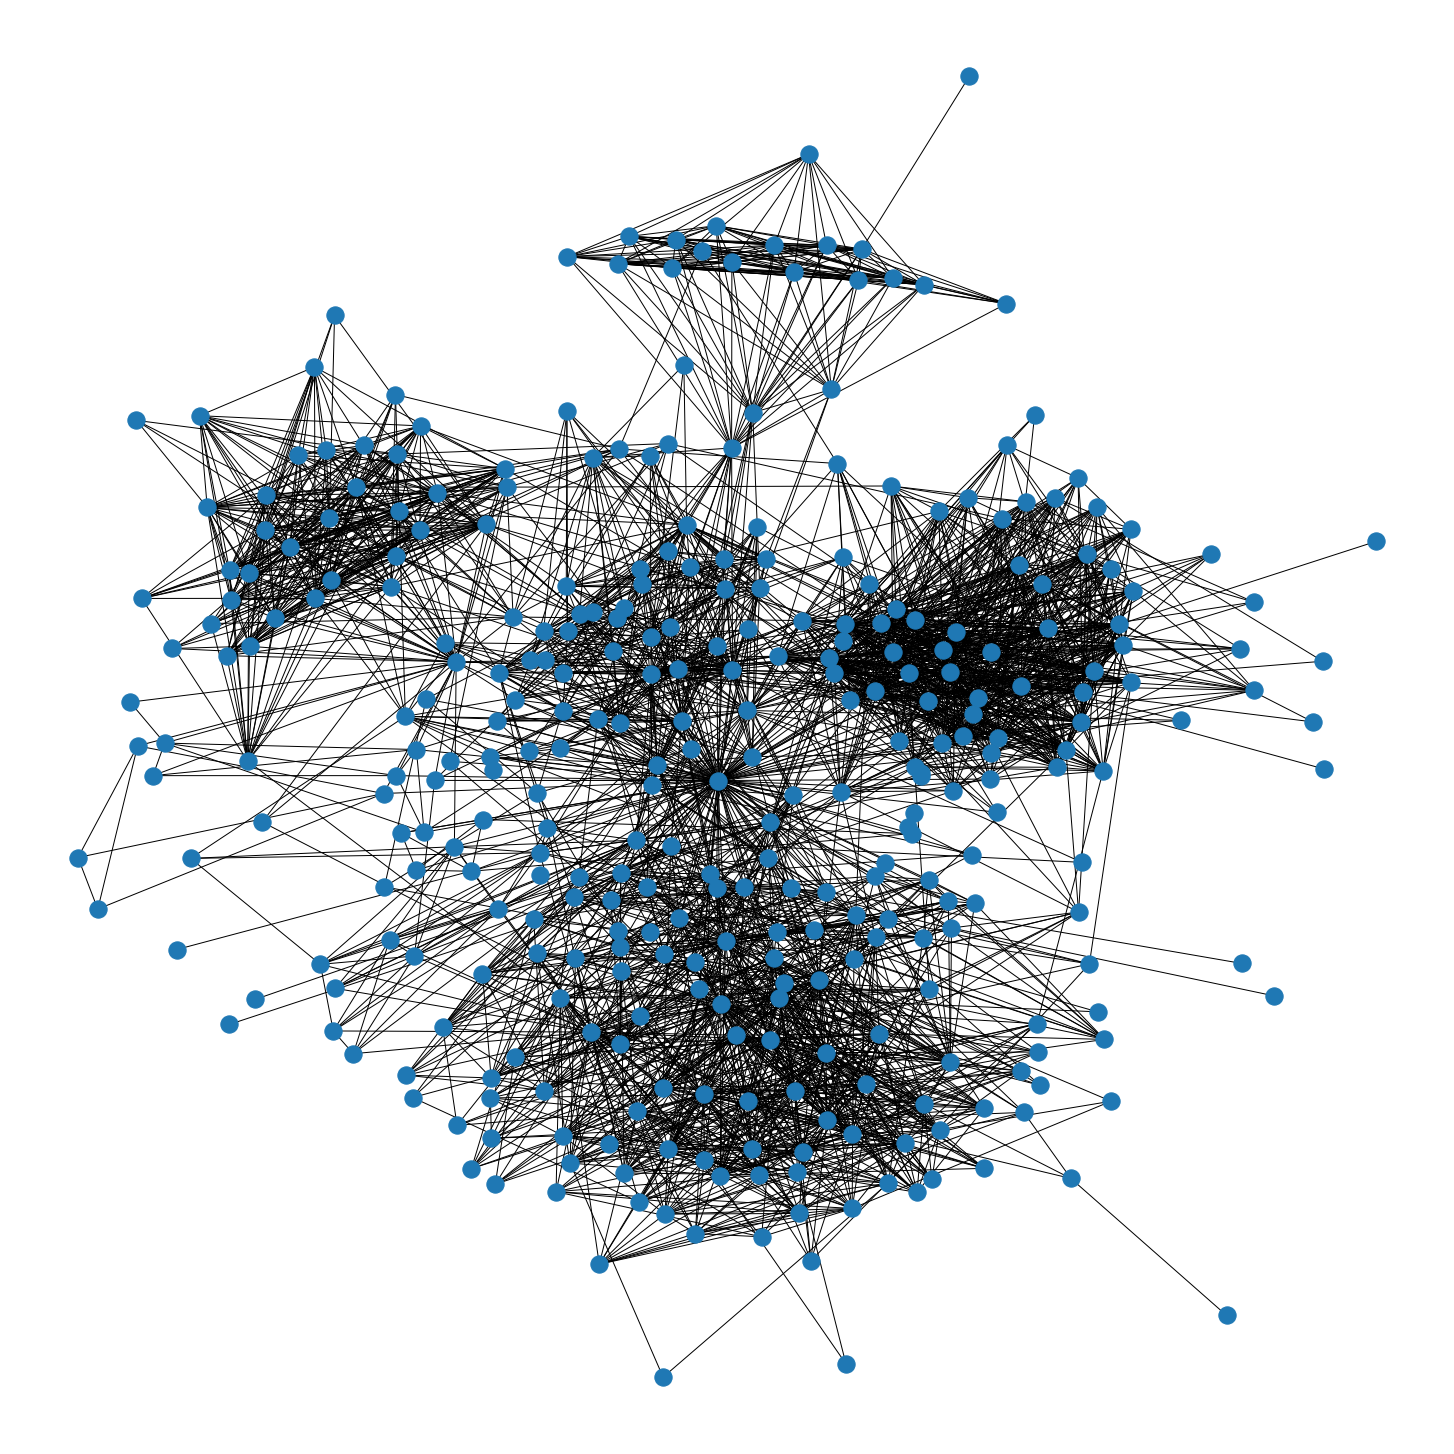

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
nx.draw_kamada_kawai(G)

In [33]:
dict(G.degree()).values()

dict_values([4, 22, 30, 22, 22, 20, 25, 26, 42, 53, 43, 50, 11, 17, 39, 10, 16, 38, 18, 36, 15, 22, 9, 32, 36, 16, 23, 29, 3, 21, 17, 19, 39, 46, 52, 20, 30, 10, 12, 3, 39, 16, 19, 3, 15, 12, 7, 17, 0, 12, 122, 15, 39, 4, 12, 8, 5, 25, 14, 17, 34, 7, 23, 15, 20, 41, 17, 1, 1, 18, 9, 26, 8, 14, 17, 41, 5, 18, 14, 20, 30, 39, 16, 21, 17, 23, 12, 23, 17, 20, 20, 39, 8, 57, 18, 3, 7, 18, 27, 4, 8, 29, 23, 16, 18, 9, 17, 17, 4, 0, 16, 18, 9, 22, 20, 11, 12, 15, 19, 11, 7, 19, 43, 26, 6, 34, 6, 11, 13, 5, 17, 13, 0, 5, 33, 27, 11, 16, 23, 34, 17, 13, 15, 12, 20, 36, 7, 5, 30, 52, 9, 34, 12, 25, 15, 9, 5, 6, 13, 32, 1, 4, 13, 35, 18, 5, 11, 1, 15, 21, 19, 0, 17, 28, 4, 48, 19, 20, 4, 8, 7, 17, 3, 5, 32, 21, 23, 4, 6, 30, 4, 3, 19, 19, 33, 46, 24, 26, 46, 18, 1, 28, 12, 33, 15, 32, 6, 17, 0, 34, 8, 21, 22, 21, 39, 25, 3, 19, 13, 11, 19, 20, 10, 14, 3, 29, 34, 26, 20, 24, 16, 27, 14, 3, 33, 17, 12, 26, 25, 15, 17, 8, 0, 14, 4, 16, 12, 4, 14, 4, 11, 19, 30, 42, 29, 33, 21, 1, 3, 10, 42, 42, 17, 

(array([70., 59., 73., 54., 32., 22., 16.,  8.,  4.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <a list of 20 Patch objects>)

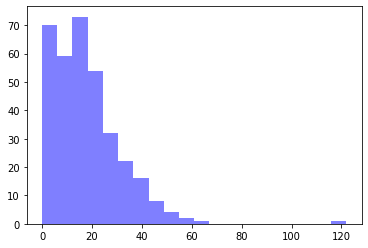

In [34]:
plt.hist(dict(G.degree()).values(), 20, facecolor='blue', alpha=0.5)

0.5492411901275409


(array([23.,  4., 19., 41., 50., 66., 46., 35., 28., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

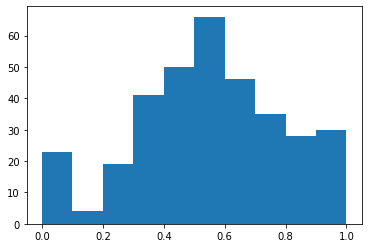

In [35]:
print(nx.average_clustering(G))
plt.hist(nx.clustering(G).values())


Создайте 100 случайных графов с тем же числом ребер и вершин и посмотрите на средний коэффициент кластеризации.

0.05057484939283169


(array([  9.,  21.,  70., 109.,  69.,  47.,  10.,   2.,   1.,   4.]),
 array([0.        , 0.01333333, 0.02666667, 0.04      , 0.05333333,
        0.06666667, 0.08      , 0.09333333, 0.10666667, 0.12      ,
        0.13333333]),
 <a list of 10 Patch objects>)

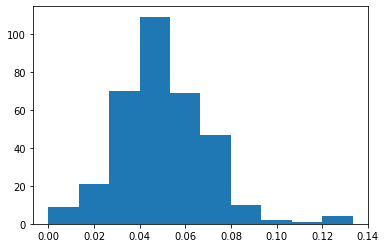

In [36]:
GR = nx.gnm_random_graph(len(G.nodes()), len(G.edges))
print(nx.average_clustering(GR))
plt.hist(nx.clustering(GR).values())

In [32]:
import json
fp = open("users.txt", "tw")
json.dump(full_friends, fp)
fp.close()

In [33]:
f=open("users.txt", "tr")
json.load(f)

[{'uid': 1099,
  'first_name': 'Игорь',
  'last_name': 'Балтийский',
  'sex': 2,
  'online': 0,
  'user_id': 1099},
 {'uid': 2541,
  'first_name': 'Александр',
  'last_name': 'Смаль',
  'sex': 2,
  'online': 1,
  'user_id': 2541},
 {'uid': 2619,
  'first_name': 'Андрей',
  'last_name': 'Фильченков',
  'sex': 2,
  'online': 0,
  'user_id': 2619},
 {'uid': 4016,
  'first_name': 'Олег',
  'last_name': 'Етеревский',
  'sex': 2,
  'online': 0,
  'user_id': 4016},
 {'uid': 4181,
  'first_name': 'Антон',
  'last_name': 'Антонов',
  'sex': 2,
  'online': 0,
  'user_id': 4181},
 {'uid': 4844,
  'first_name': 'Антон',
  'last_name': 'Чухнов',
  'sex': 2,
  'online': 0,
  'user_id': 4844},
 {'uid': 5245,
  'first_name': 'Diana',
  'last_name': 'Sidorenko',
  'sex': 1,
  'online': 0,
  'user_id': 5245},
 {'uid': 5338,
  'first_name': 'Павел',
  'last_name': 'Пашечко',
  'sex': 2,
  'online': 0,
  'user_id': 5338},
 {'uid': 5392,
  'first_name': 'Никита',
  'last_name': 'Иваньков',
  'sex': 2,
  'o

In [13]:
def plot_graph(g):
    with plt.xkcd():
        k = nx.degree(g)

        plt.figure(1, figsize=(60,45))
        coord = nx.kamada_kawai_layout(g)
#        coord = nx.spring_layout(g)
#        coord = nx.circular_layout(g)
        labels={nd: g.node[nd]['name'] for (nd) in g.nodes()}
        nx.draw_networkx(g, pos=coord, nodelist=dict(k).keys(), node_size=[v*30 for v in dict(k).values()], 
                         font_size=17, node_color=list(dict(k).values()), labels=labels, cmap=plt.cm.Blues)

C:\tools\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


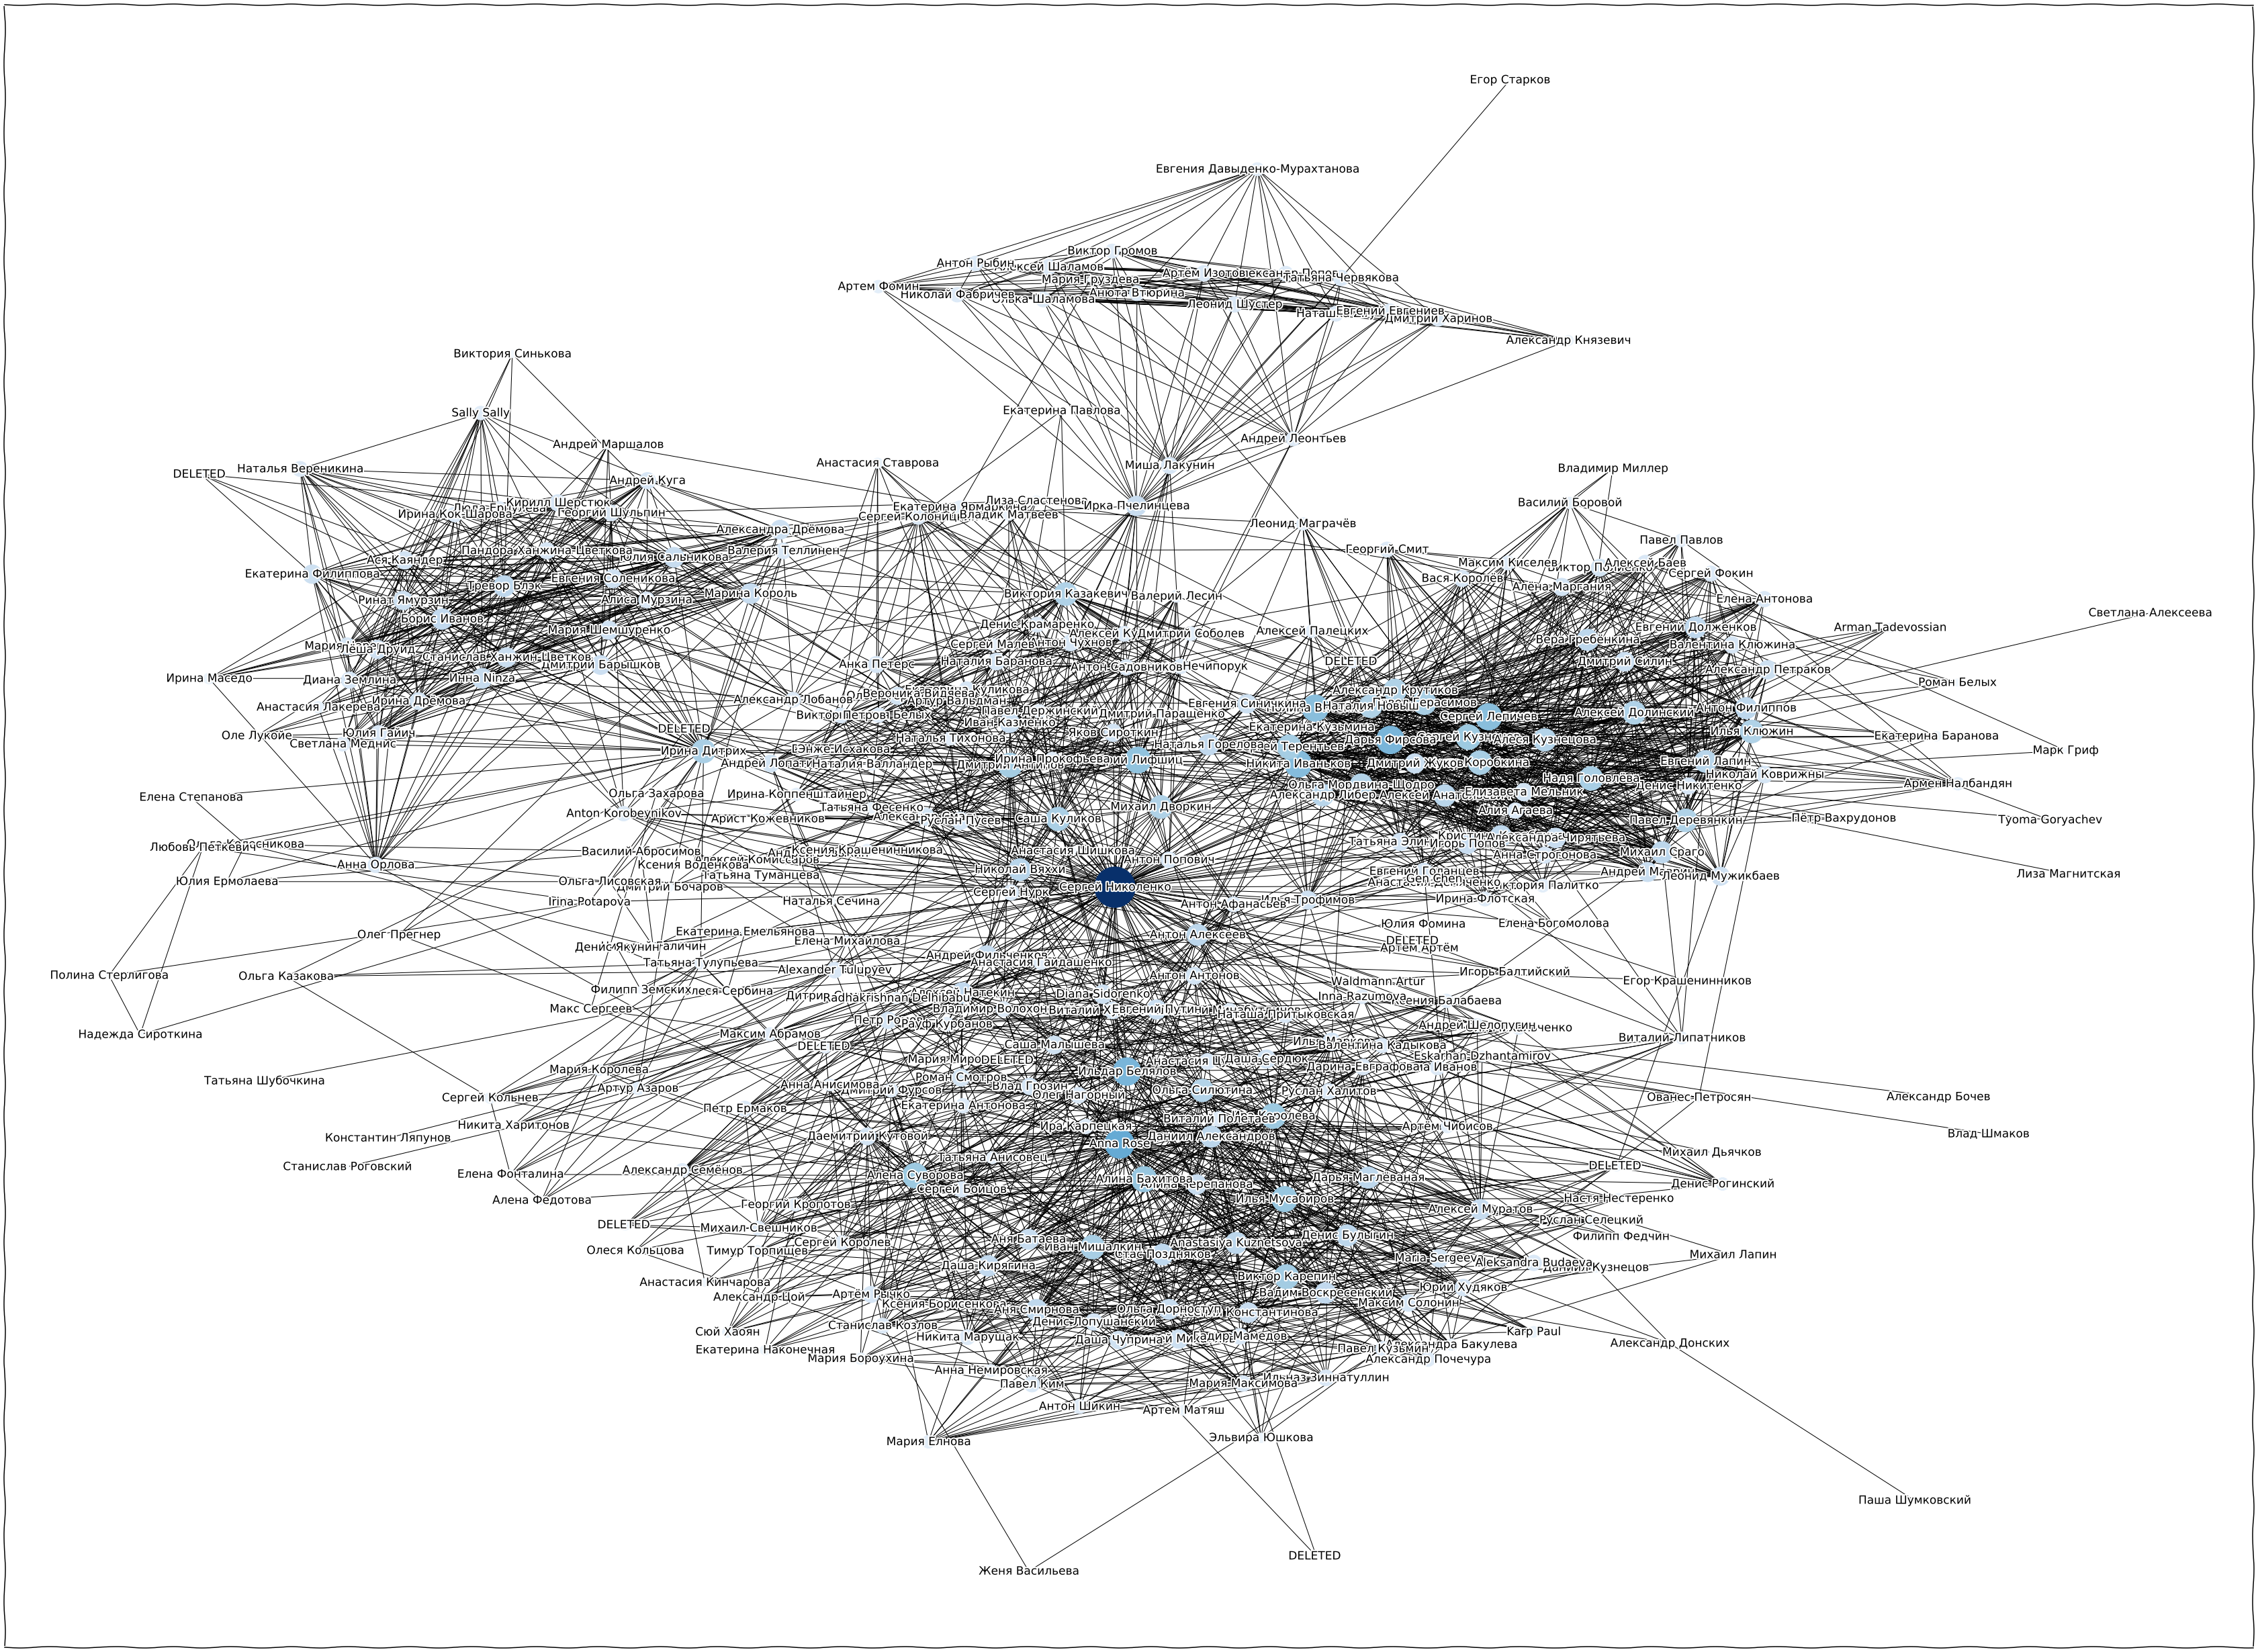

In [14]:
plot_graph(G)

In [15]:
from networkx.readwrite import json_graph
data1 = json_graph.node_link_data(G)

In [16]:
data1

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'name': 'Игорь Балтийский', 'id': 1099},
  {'name': 'Александр Смаль', 'id': 2541},
  {'name': 'Андрей Фильченков', 'id': 2619},
  {'name': 'Олег Етеревский', 'id': 4016},
  {'name': 'Антон Антонов', 'id': 4181},
  {'name': 'Антон Чухнов', 'id': 4844},
  {'name': 'Илья Трофимов', 'id': 4969},
  {'name': 'Diana Sidorenko', 'id': 5245},
  {'name': 'Павел Герасимов', 'id': 5338},
  {'name': 'Никита Иваньков', 'id': 5392},
  {'name': 'Дмитрий Антипов', 'id': 6099},
  {'name': 'Юрий Лифшиц', 'id': 6413},
  {'name': 'Сергей Малев', 'id': 7091},
  {'name': 'Алексей Кузнецов', 'id': 7207},
  {'name': 'Михаил Дворкин', 'id': 7373},
  {'name': 'DELETED ', 'id': 7600},
  {'name': 'Анастасия Белых', 'id': 7607},
  {'name': 'Ольга Мордвина-Щодро', 'id': 9017},
  {'name': 'Сергей Нурк', 'id': 9216},
  {'name': 'Евгений Лапин', 'id': 9897},
  {'name': 'Ирина Флотская', 'id': 10894},
  {'name': 'Андрей Лопатин', 'id': 11191},
  {'name

In [18]:
#d = json_graph.node_link_data(G)  # node-link format to serialize
# write json
json.dump(data1, open("force/force.json", "w"))
print("Wrote node-link JSON data to force/force.json")


Wrote node-link JSON data to force/force.json


In [19]:
import flask

# Serve the file over http to allow for cross origin requests
app = flask.Flask(__name__, static_folder="force")


@app.route("/")
def static_proxy():
    return app.send_static_file("force.html")


print("\nGo to http://localhost:8000 to see the example\n")
app.run(port=8000)


Go to http://localhost:8000 to see the example

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
